REPASO PRIMER PARCIAL: Matplotlib.pyplot y Seaborn

Matplolib es una libreria que se encarga de todo lo relacionado a los gráficos de python. Seaborn es otra libreia la cual tiene gráficos más sofisticados y más agradables visualmente aunque no llega a dominar todas las variables que domina matplotlib.

In [1]:
import numpy as np #Tratamiento de vectores y matrices
import pandas as pd #tratamiento de datos (series y dataframes)

import matplotlib.pyplot as plt #opciones de gráficos                #Importo las librerias correspondientes

Este dataframe se utilizará para algunos gráficos

In [2]:
data = pd.read_csv("C:/Users/Nancy/Desktop/Phyton/Clase 3/breast-cancer.csv")
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


Matplotlib.pyplot

Gráfico boxplot

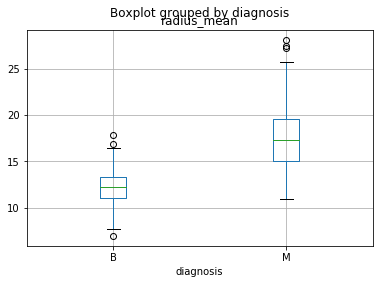

In [4]:
data.boxplot('radius_mean', by='diagnosis') # Se separa al promedio de los radios por diagnosis

Scatter Plot (gráfica de puntos) y plt.plot (graficador general)

Ajustar a mano una parábola que ajuste 'area_mean' en función de 'radius_mean' y plotearla justo al scatterplot.

Text(0.5,0,'Promedio Radio')

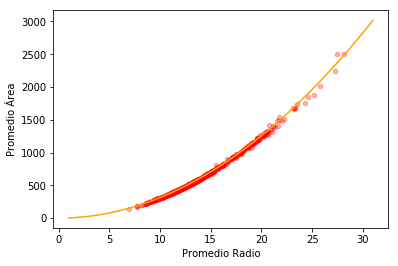

In [33]:
data.plot.scatter('radius_mean','area_mean',color="red",Alpha=0.3) #Gráfico en un gráfico de puntos radios vs. área
x=np.linspace(1,31,100) #Se define un eje x de 1 a 31 a 100 pasos   #Alpha es para hacer que haya cierta transparencia en la figura.

#En este caso se le agregó una línea creada "a mano".
y=3.14*(x**2)  #Saco valores "y" en función de "x". 
plt.plot(x,y,color="orange") #Debo poner los valores de x e y (deben ser numéricos).
plt.ylabel("Promedio Área") #Agrego etiquetas a los ejes del gráfico
plt.xlabel("Promedio Radio")

Abro otro dataframe

In [11]:
df = pd.read_csv("C:/Users/Nancy/Desktop/Phyton/Clase 3/Production_Crops_E_All_Data.csv",  encoding = "ISO-8859-1") #Carga el dataframe a partir de un archivo .csv
df.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2012,Y2012F,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,13490.0,NaN,14114.0,NaN,13703.0,NaN,14676.0,NaN,19481.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,45960.0,Fc,29910.0,Fc,19996.0,Fc,16521.0,Fc,16859.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,62000.0,NaN,42215.0,NaN,27400.0,NaN,24246.0,NaN,32843.0,NaN


In [12]:
dg = df[(df['Item']=='Tomatoes') & (df['Area']=='Argentina') ] #Arma un nuevo dataframe donde se toman los datos de tomates en la Argentina.
year_cols=['Y'+str(y) for y in np.arange(1961,2017)] #Arma una lista con los valores de los años desde 1961 hasta el 2016
dg[year_cols].T #Realiza la transversa.
df_ARG_Tom = dg[year_cols].T #Define un nuevo dataframe.
df_ARG_Tom.columns=['Superficie','Rinde','Producción'] #Nombra las columnas

Graficar todas columnas de un dataframe con el graficador .plot (es similar a plt.plot). Toma al index como eje x

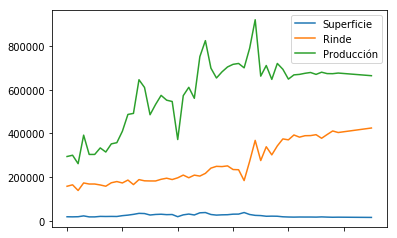

In [24]:
df_ARG_Tom.plot() #Grafica las 3 columnas en un gráfico de líneas.

Graficar una columna de un dataframe con el graficador .plot (es similar a plt.plot)

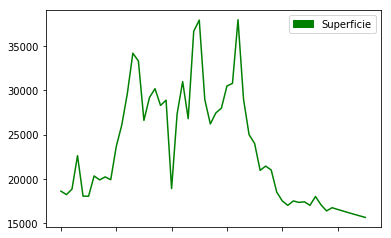

In [67]:
df_ARG_Tom['Superficie'].plot(color="green") #Grafica solo la columna del dataframe, o lo que es lo mismo una serie, si no le pongo nada por default me da un gráfico de lineas.
import matplotlib.patches as mpatches
patch=mpatches.Patch(color="green",label="Superficie")
plt.legend(handles=[patch])

Se le puede variar algunas propiedades

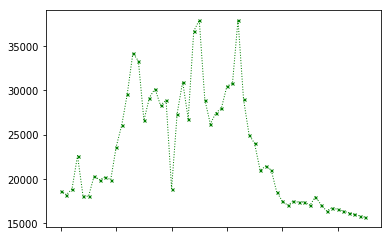

In [15]:
df_ARG_Tom['Superficie'].plot(color="green",markersize=3,marker="x",linewidth=1, ls=":")

Incluso se les puede cambiar el estilo

([], <a list of 0 Text xticklabel objects>)

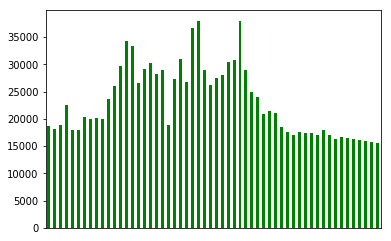

In [22]:
df_ARG_Tom['Superficie'].plot(color="green", kind="bar")
plt.xticks([]) #Oculta los valores de eje x

También se puede utilizar con dataframes cuyo index es una serie de tiempo

In [25]:
fname = 'C:/Users/Nancy/Desktop/Phyton/Clase 4/sfba_2014_04.csv'
df = pd.read_csv(fname,parse_dates=['Time'],index_col='Time')

En el dataframe entero

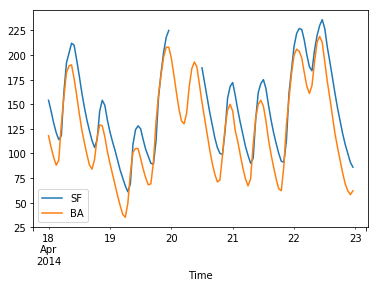

In [31]:
df['2014-04-18':'2014-04-22'].plot() 

O en una de las series (columnas) que lo componen

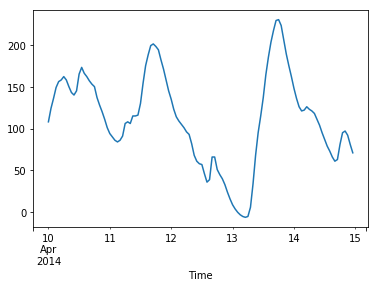

In [32]:
df.SF['2014-04-10':'2014-04-14'].plot()

Seaborn

Para algunos detalles es necesario utilizar matplotlib.pyplot

In [34]:
import seaborn as sns #gráficos más especializados

In [35]:
df = pd.read_csv("C:/Users/Nancy/Desktop/Phyton/Clase 3/SAmericaFruitProd.csv",  encoding = "ISO-8859-1") #Abre un archivo .csv (separado por comas)

Swarmplot o gráfico de puntos

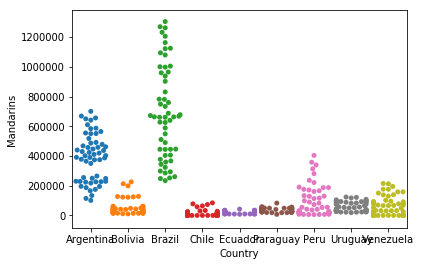

In [38]:
plt.figure() #Función para abrir una figura
sns.swarmplot(x=df.Country, y=df.Mandarins) #Gráfico de puntos

Violin plot

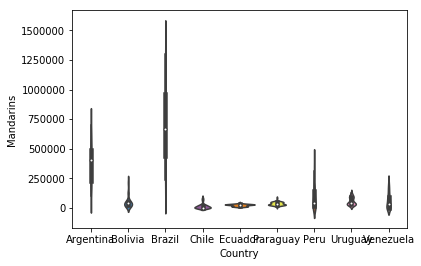

In [44]:
sns.violinplot(x=df.Country, y=df.Mandarins, palette="Set1") #Gráfico de violín

Boxplot de Seaborn

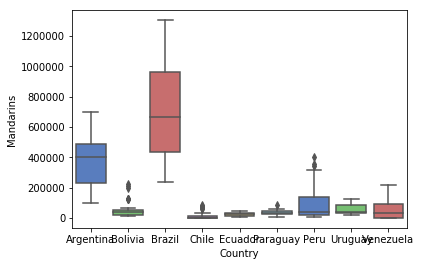

In [47]:
sns.boxplot(x=df.Country, y=df.Mandarins, palette="muted")

Countplot

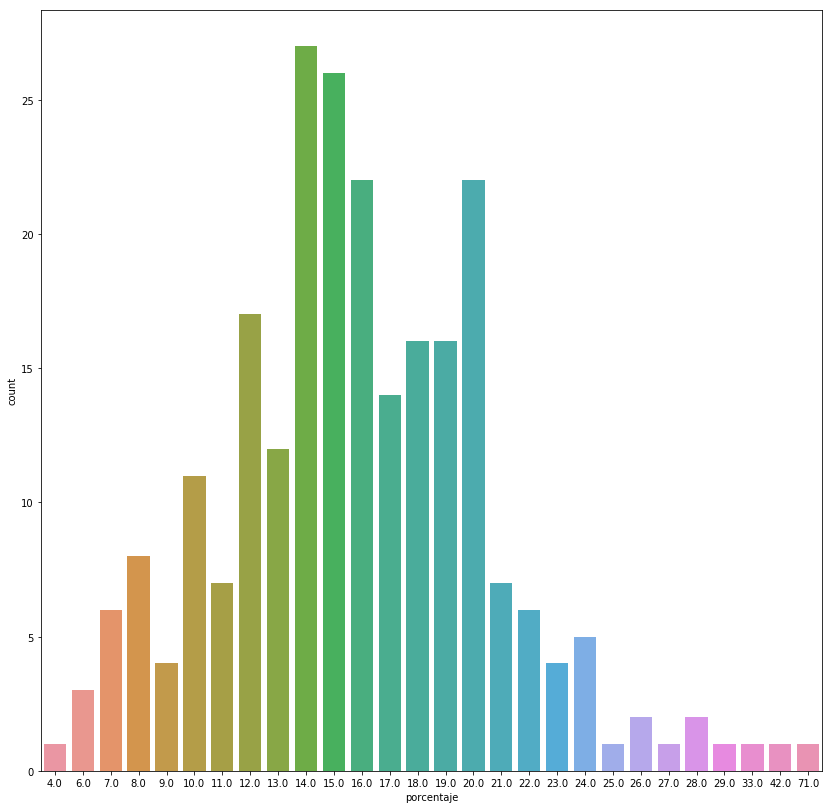

In [53]:
tips = pd.read_csv("C:/Users/Nancy/Desktop/Phyton/Clase 3/tips.csv",  encoding = "ISO-8859-1")

plt.figure(figsize=(14,14)) #Abre una figura de las dimensiones pedidas

tips["porcentaje"]= np.round(100*tips["tip"]/tips["total_bill"])

sns.countplot(x='porcentaje', data=tips) #Realiza el countplot

Otros ejemplos de countplot

In [54]:
filename = 'C:/Users/Nancy/Desktop/Phyton/Resumenes/INDIVIDUAL_T2_GBA.csv'
df=pd.read_csv(filename,dtype={'Nro_Vivienda':str}) #Indico que tomaré al número de vivienda como un string

Cantidad de hombres y mujeres encuestados:
Mujer     68582
Hombre    61930
Name: Sexo, dtype: int64


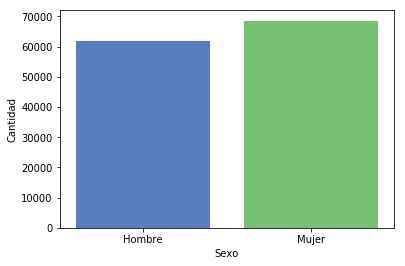

In [55]:
sns.countplot(x="Sexo",data=df,palette="muted")
plt.ylabel("Cantidad")
print("Cantidad de hombres y mujeres encuestados:")
print(df.Sexo.value_counts())

Cantidad por nivel educativo:
3    25556
2    22439
4    22342
1    20868
6    14304
5    12914
7    12089
Name: NivelEd, dtype: int64


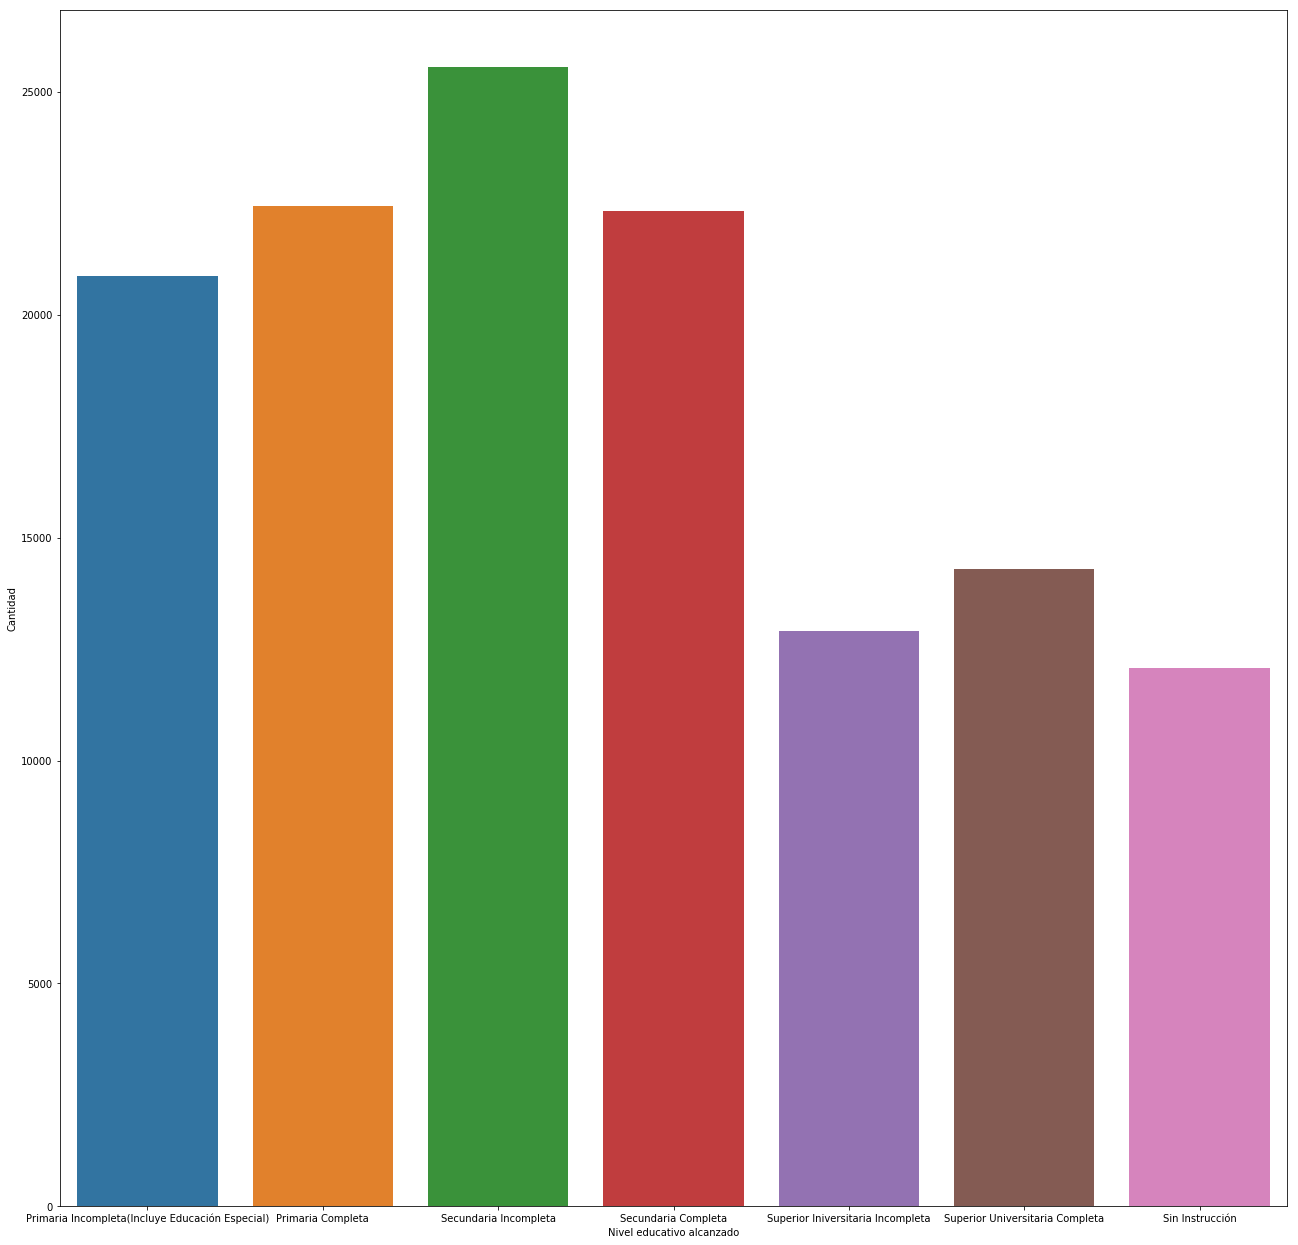

In [57]:
plt.figure(figsize=(22,22))
sns.countplot(x="NivelEd", data=df)
plt.ylabel("Cantidad")
plt.xlabel("Nivel educativo alcanzado")
ne=[0,1,2,3,4,5,6]
plt.xticks(ne,("Primaria Incompleta(Incluye Educación Especial)","Primaria Completa","Secundaria Incompleta","Secundaria Completa","Superior Iniversitaria Incompleta","Superior Universitaria Completa","Sin Instrucción")) #Encontrar los verdaderos significados
print("Cantidad por nivel educativo:")   #Cambia los valores que aparecen en los ejes
print(df.NivelEd.value_counts())

Factorplot

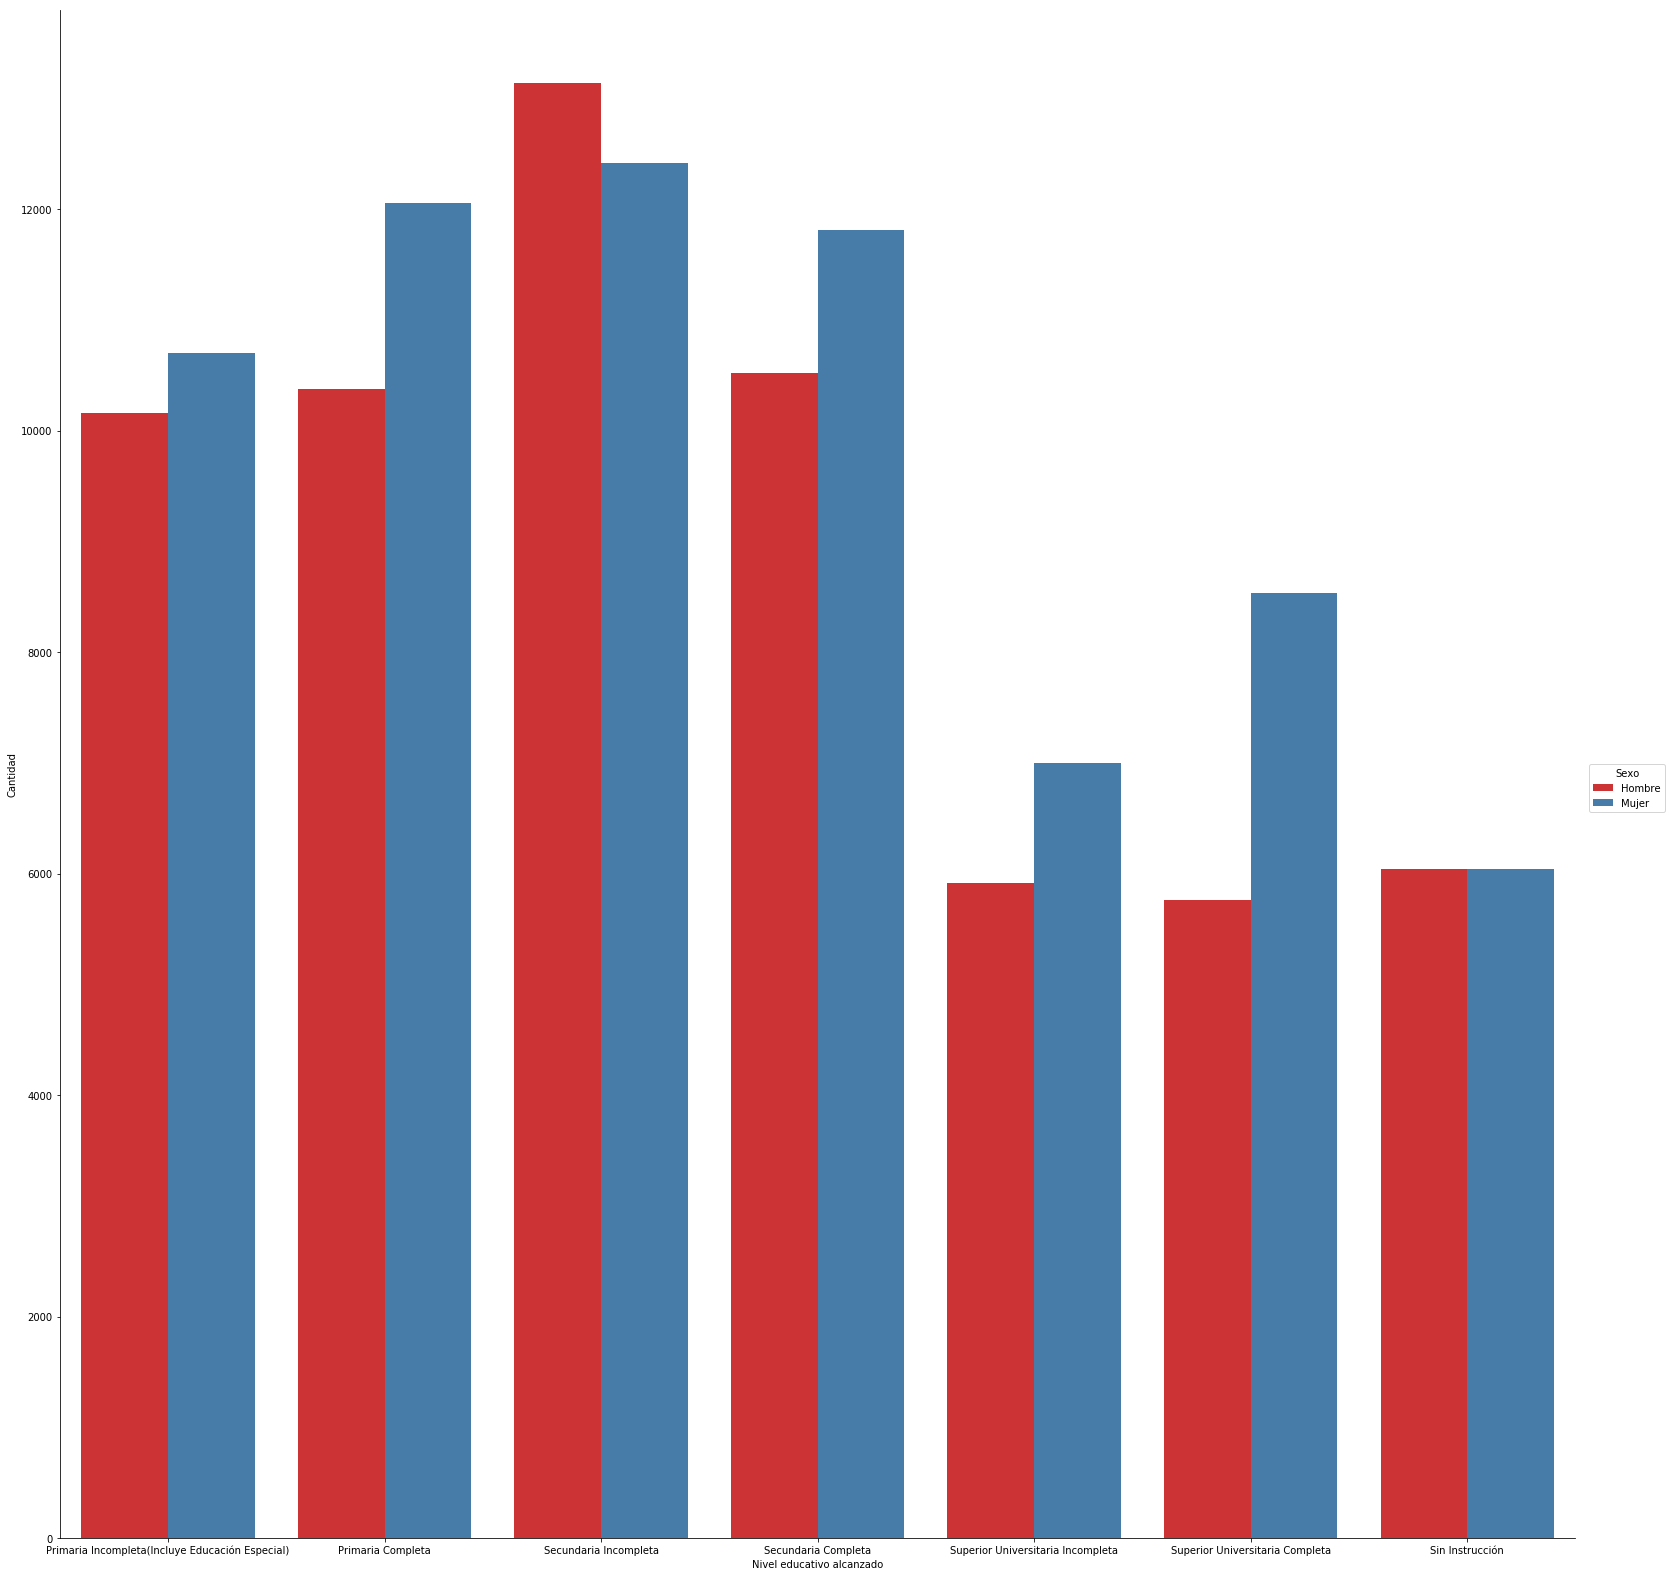

In [58]:
Y=sns.factorplot(x="NivelEd",data=df, hue="Sexo",kind="count",size=22,palette="Set1")
ne=[0,1,2,3,4,5,6]
plt.xticks(ne,("Primaria Incompleta(Incluye Educación Especial)","Primaria Completa","Secundaria Incompleta","Secundaria Completa","Superior Universitaria Incompleta","Superior Universitaria Completa","Sin Instrucción")) #Encontrar los verdaderos significados
Y.set_axis_labels("Nivel educativo alcanzado","Cantidad")

Otro ejemplo de factorplot

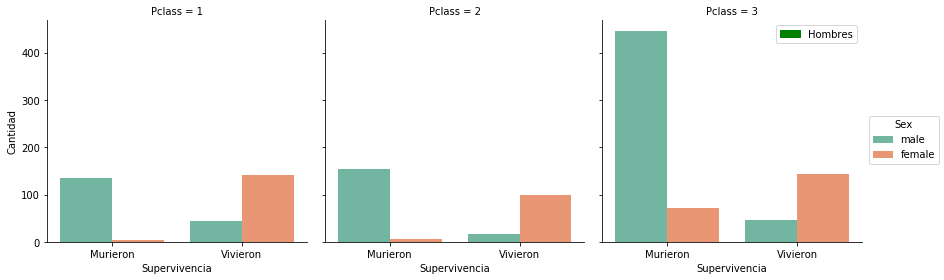

In [66]:
df = pd.read_csv("C:/Users/Nancy/Desktop/Titanic.csv",  encoding = "ISO-8859-1")
df_comp=df[["Survived","Pclass","Sex"]]
comp=sns.factorplot(x="Survived", data=df_comp, hue="Sex", col="Pclass", kind="count", palette="Set2") #Permite hacer gráfcios con más variables a la vez
ind=[0,1]
plt.xticks(ind,("Murieron","Vivieron"))
comp.set_axis_labels("Supervivencia","Cantidad") #En este tipo de gráfico asi se ubica el nombre de los ejes.